# Neural network with Keras on fashion

In this notebook, a neural network is trained to classify clothing items, such as sneakers and shirts (dataset from Zalando:https://github.com/zalandoresearch/fashion-mnist). It uses [tf.keras](https://keras.io/), an API for creating and training models in TensorFlow.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils                         # NumPy related tools

## Import the Fashion dataset.

Here we use the [Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) from Zalando (MIT License). This contains 70,000 grayscale images in 10 categories ('T-shirt/top', 'Trouser', 'Sweater', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'). The images show single garments with low resolution (28 x 28 pixels), as seen here:

Load the dataset goes via Keras functions:

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# Data set and formats

Let's first explore the format of the dataset before training the model. The following shows that there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [4]:
train_images.shape


(60000, 28, 28)

Fortunately, there are probably just as many labels :-):

In [5]:
len(train_labels)

60000

Test data looks the same and is labeled accordingly:

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_images)

10000

# Preprocess data

The data must be preprocessed before training the network. If you examine the first image in the training set, you will notice that the pixel values range from 0 to 255:

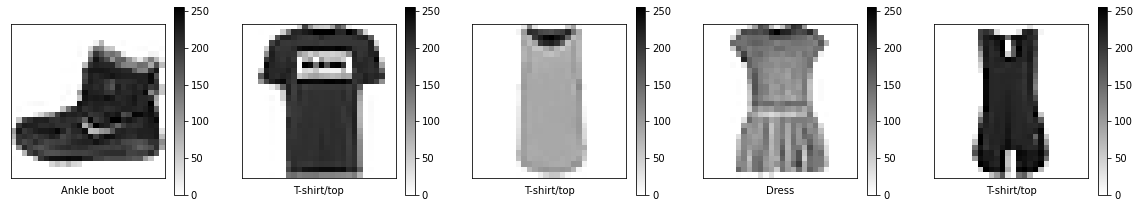

In [8]:
plt.figure(figsize=(20,20))

for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.colorbar()
plt.show()



In [9]:
train_images = train_images.reshape(60000, 784)
test_images = test_images.reshape(10000, 784)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255
test_images /= 255

print("Training matrix shape", train_images.shape)
print("Test matrix shape", test_images.shape)

Training matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [10]:
train_labels = np_utils.to_categorical(train_labels, 10)
test_labels = np_utils.to_categorical(test_labels, 10)

In [11]:
model = Sequential()

In [12]:
model.add(Dense(512, input_shape = (784,)))

In [13]:
model.add(Activation('relu'))

In [14]:
model.add(Dense(512))
model.add(Activation('relu'))

In [15]:
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trai

In [16]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
model.fit(train_images, train_labels, batch_size = 1000, epochs = 1, verbose = 1)

60/60 [==============================] - 1s 12ms/step - loss: 1.7969 - accuracy: 0.5079


In [17]:
score = model.evaluate(test_images, test_labels)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 1.4277 - accuracy: 0.6362
Test score: 1.427728295326233
Test accuracy: 0.6362000107765198


In [18]:
predicted_classes = model.predict(test_images)
correct_indices = np.nonzero(predicted_classes == test_labels)[0]
incorrect_indices = np.nonzero(predicted_classes != test_labels)[0]

<Figure size 432x288 with 0 Axes>

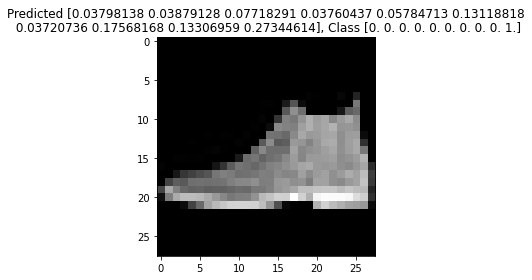

In [19]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(1,1,i+1)
    plt.imshw(test_images[correct].reshape(28,28), cmap = 'gray', interpolation = 'none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_labels[correct]))
    
plt.tight_layout()

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot()
    plt.imshow(test_images[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_labels[incorrect]))
    
plt.tight_layout()